<a href="https://colab.research.google.com/github/ElizaChurokova/ds-fire-calls-dataset/blob/main/notebook/Fire_calls_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fire Department calls dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import urllib.request

url = "https://data.sfgov.org/api/views/nuek-vuh3/rows.csv?accessType=DOWNLOAD"
destination = "/content/drive/MyDrive/fire_calls.csv"

urllib.request.urlretrieve(url, destination)

print("Файл успешно сохранён:", destination)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/fire_calls.csv', low_memory=False)


# Dataset analysis: cleaning, screening the dataset

In [ ]:
df.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,RowID,case_location,data_as_of,data_loaded_at,Analysis Neighborhoods
0,160943727,53,16037460,Medical Incident,04/03/2016,04/03/2016,04/03/2016 11:15:12 PM,04/03/2016 11:18:05 PM,04/03/2016 11:18:33 PM,04/03/2016 11:18:45 PM,...,MEDIC,2.0,4.0,6.0,Tenderloin,160943727-53,POINT (-122.41983 37.786358),02/05/2024 03:27:52 AM,02/05/2024 10:56:25 AM,36.0
1,161021964,AM14,16040565,Medical Incident,04/11/2016,04/11/2016,04/11/2016 01:14:47 PM,04/11/2016 01:19:53 PM,04/11/2016 01:20:42 PM,04/11/2016 01:21:06 PM,...,PRIVATE,1.0,2.0,9.0,Mission,161021964-AM14,POINT (-122.42204 37.76654),02/05/2024 03:27:52 AM,02/05/2024 10:56:25 AM,20.0
2,160930738,85,16036742,Structure Fire / Smoke in Building,04/02/2016,04/01/2016,04/02/2016 07:48:03 AM,04/02/2016 07:49:50 AM,04/02/2016 07:50:12 AM,04/02/2016 07:50:48 AM,...,MEDIC,10.0,2.0,6.0,Tenderloin,160930738-85,POINT (-122.416985 37.78242),02/05/2024 03:27:52 AM,02/05/2024 10:56:25 AM,36.0
3,160931745,E03,16036856,Medical Incident,04/02/2016,04/02/2016,04/02/2016 01:08:02 PM,04/02/2016 01:09:44 PM,04/02/2016 01:10:16 PM,04/02/2016 01:13:09 PM,...,ENGINE,2.0,2.0,6.0,Tenderloin,160931745-E03,POINT (-122.41762 37.78378),02/05/2024 03:27:52 AM,02/05/2024 10:56:25 AM,36.0
4,160921757,E09,16036446,Medical Incident,04/01/2016,04/01/2016,04/01/2016 01:20:24 PM,04/01/2016 01:21:15 PM,04/01/2016 01:21:31 PM,04/01/2016 01:23:44 PM,...,ENGINE,1.0,10.0,10.0,Bayview Hunters Point,160921757-E09,POINT (-122.39052 37.73754),02/05/2024 03:27:52 AM,02/05/2024 10:56:25 AM,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7135987 entries, 0 to 7135986
Data columns (total 37 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   Call Number                           int64  
 1   Unit ID                               object 
 2   Incident Number                       int64  
 3   Call Type                             object 
 4   Call Date                             object 
 5   Watch Date                            object 
 6   Received DtTm                         object 
 7   Entry DtTm                            object 
 8   Dispatch DtTm                         object 
 9   Response DtTm                         object 
 10  On Scene DtTm                         object 
 11  Transport DtTm                        object 
 12  Hospital DtTm                         object 
 13  Call Final Disposition                object 
 14  Available DtTm                        object 
 15  Address        

In [ ]:
# Дубликаты
print("Дубликаты:", df.duplicated().sum())

# Пустые значения
print(df.isna().sum())


Дубликаты: 0
Call Number                                   0
Unit ID                                       0
Incident Number                               0
Call Type                                     0
Call Date                                     0
Watch Date                                    0
Received DtTm                                 0
Entry DtTm                                    0
Dispatch DtTm                                 0
Response DtTm                            461835
On Scene DtTm                           1581112
Transport DtTm                          5289198
Hospital DtTm                           5430289
Call Final Disposition                        0
Available DtTm                            77366
Address                                    1337
City                                      10577
Zipcode of Incident                       15303
Battalion                                     0
Station Area                               2722
Box                        

In [ ]:
df_sample = df.sample(n=200000, random_state=42).copy()


In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 244679 to 16315
Data columns (total 37 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Call Number                           200000 non-null  int64  
 1   Unit ID                               200000 non-null  object 
 2   Incident Number                       200000 non-null  int64  
 3   Call Type                             200000 non-null  object 
 4   Call Date                             200000 non-null  object 
 5   Watch Date                            200000 non-null  object 
 6   Received DtTm                         200000 non-null  object 
 7   Entry DtTm                            200000 non-null  object 
 8   Dispatch DtTm                         200000 non-null  object 
 9   Response DtTm                         195022 non-null  object 
 10  On Scene DtTm                         161260 non-null  object 
 11  T

In [ ]:
# Создание ResponseTime в минутах
df_sample['Received DtTm'] = pd.to_datetime(df_sample['Received DtTm'], errors='coerce')
df_sample['Response DtTm'] = pd.to_datetime(df_sample['Response DtTm'], errors='coerce')

df_sample['ResponseTime'] = (df_sample['Response DtTm'] - df_sample['Received DtTm']).dt.total_seconds() / 60
df_sample = df_sample.dropna(subset=['ResponseTime'])


/tmp/ipython-input-135598037.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sample['Received DtTm'] = pd.to_datetime(df_sample['Received DtTm'], errors='coerce')
/tmp/ipython-input-135598037.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sample['Response DtTm'] = pd.to_datetime(df_sample['Response DtTm'], errors='coerce')


In [ ]:
# Выбор колонки для модели
cols = ['ResponseTime', 'Call Type', 'Station Area', 'Original Priority',
        'Number of Alarms', 'Unit Type', 'City', 'Battalion', 'Received DtTm']

df_model = df_sample[cols]


In [ ]:
# Создаём признаки времени из Received DtTm
df_model['Hour'] = df_model['Received DtTm'].dt.hour
df_model['Weekday'] = df_model['Received DtTm'].dt.weekday
df_model['Month'] = df_model['Received DtTm'].dt.month

/tmp/ipython-input-1557535950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Hour'] = df_model['Received DtTm'].dt.hour
/tmp/ipython-input-1557535950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Weekday'] = df_model['Received DtTm'].dt.weekday
/tmp/ipython-input-1557535950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
# Убираем оригинальный столбец даты
df_model = df_model.drop(columns=['Received DtTm'])


In [ ]:
df_model.head()

,ResponseTime,Call Type,Station Area,Original Priority,Number of Alarms,Unit Type,City,Battalion,Hour,Weekday,Month
244679,2.550000,Medical Incident,7.0,E,1.0,MEDIC,San Francisco,B06,21,5,3
214172,2.300000,Medical Incident,44.0,3,1.0,MEDIC,San Francisco,B09,21,5,1
10221,3.600000,Medical Incident,12.0,2,1.0,PRIVATE,San Francisco,B05,12,6,4
139106,2.300000,Medical Incident,36.0,3,1.0,PRIVATE,San Francisco,B02,16,1,10
107275,0.966667,Structure Fire / Smoke in Building,44.0,3,1.0,ENGINE,San Francisco,B09,17,6,8


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195022 entries, 244679 to 16315
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ResponseTime       195022 non-null  float64
 1   Call Type          195022 non-null  object 
 2   Station Area       194891 non-null  float64
 3   Original Priority  194937 non-null  object 
 4   Number of Alarms   195021 non-null  float64
 5   Unit Type          195021 non-null  object 
 6   City               194583 non-null  object 
 7   Battalion          195021 non-null  object 
 8   Hour               195022 non-null  int32  
 9   Weekday            195022 non-null  int32  
 10  Month              195022 non-null  int32  
dtypes: float64(3), int32(3), object(5)
memory usage: 15.6+ MB


In [ ]:
df_model.rename(columns={'Call Type': 'Call_type'}, inplace=True)

In [ ]:
df_model.rename(columns={'Original Priority':'Original_priority'}, inplace=True)

In [ ]:
df_model.rename(columns={'Unit Type':'Unit_type'}, inplace=True)

In [ ]:
df_model.Original_priority.unique()

array(['E', '3', '2', 'B', 'A', 'I', 'C', '1', nan], dtype=object)

In [ ]:
df_model['Original_priority'].value_counts(dropna=False)


,count
Original_priority,
3,125484
2,47072
A,9232
E,5968
B,4104
C,2226
1,604
I,247
NaN,85


In [ ]:
df_model['Original_priority'].nunique()


8

In [ ]:
# чтобы понять влияние категории на таргет, стоит ли дальше работать с этой фичой или нет
df_model.groupby('Original_priority')['ResponseTime'].mean()



,ResponseTime
Original_priority,
1,18.343019
2,4.609564
3,4.009254
A,2.754239
B,2.515850
C,2.597664
E,3.156700
I,3.579892


In [ ]:
#видим что тут OHE не подойдет. нужен label
df_model['Original_priority'] = df_model['Original_priority'].fillna('Unknown')
mapping = {
    'I': 0,
    'E': 1,
    'C': 2,
    'B': 3,
    'A': 4,
    '4': 5,
    '3': 6,
    '2': 7,
    '1': 8,
    'Unknown':9
}

df_model['Original_priority_encoded'] = df_model['Original_priority'].map(mapping).astype(int)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195022 entries, 244679 to 16315
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ResponseTime               195022 non-null  float64
 1   Call_type                  195022 non-null  object 
 2   Station Area               194891 non-null  float64
 3   Original_priority          195022 non-null  object 
 4   Number of Alarms           195021 non-null  float64
 5   Unit-type                  195021 non-null  object 
 6   City                       194583 non-null  object 
 7   Battalion                  195021 non-null  object 
 8   Hour                       195022 non-null  int32  
 9   Weekday                    195022 non-null  int32  
 10  Month                      195022 non-null  int32  
 11  Original_priority_encoded  195022 non-null  int64  
dtypes: float64(3), int32(3), int64(1), object(5)
memory usage: 17.1+ MB


In [ ]:
df_model['Unit-type'].fillna('Uniknown', inplace=True)

/tmp/ipython-input-3244763769.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Unit-type'].fillna('Uniknown', inplace=True)


In [ ]:
df_model['Unit-type'].unique()

array(['MEDIC', 'PRIVATE', 'ENGINE', 'CHIEF', 'SUPPORT', 'TRUCK',
       'RESCUE SQUAD', 'RESCUE CAPTAIN', 'AIRPORT', 'CP', 'INVESTIGATION',
       'BLS', 'Uniknown'], dtype=object)

In [ ]:
#OHE - так как нет приоритета в признаках
df_model['Unit-type'] = df_model['Unit-type'].replace('Uniknown', 'Unknown')


In [ ]:
#проверка влияния этого признака на таргет
unit_response = df_model.groupby('Unit-type')['ResponseTime'].mean().sort_values()
print(unit_response)


Unit-type
AIRPORT            0.043089
Unknown            2.816667
MEDIC              3.477937
PRIVATE            3.698322
ENGINE             4.041505
RESCUE SQUAD       4.138724
TRUCK              4.268582
BLS                4.686364
CHIEF              4.907046
CP                 6.106911
RESCUE CAPTAIN     6.449718
SUPPORT            6.606822
INVESTIGATION     22.461684
Name: ResponseTime, dtype: float64


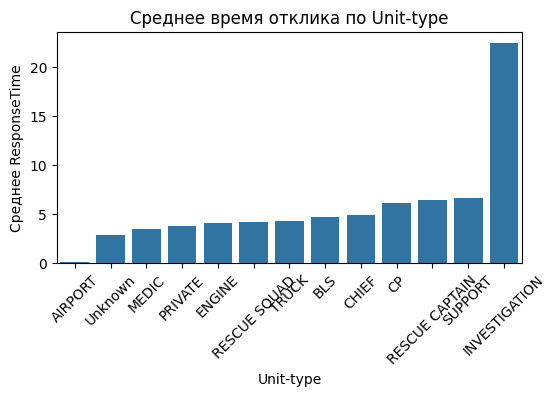

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,3))
sns.barplot(x=unit_response.index, y=unit_response.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее ResponseTime')
plt.title('Среднее время отклика по Unit-type')
plt.show()


In [ ]:
df_model.City.unique()

array(['San Francisco', 'SF', 'Treasure Isla', nan, 'Presidio',
       'Fort Mason', 'Daly City', 'Yerba Buena', 'Hunters Point', 'YB',
       'PR', 'DC', 'TI', 'Brisbane', 'FM'], dtype=object)

In [ ]:
city_mapping = {
    'SF': 'San Francisco',
    'YB': 'Yerba Buena',
    'TI': 'Treasure Isla',
    'PR': 'Presidio',
    'DC': 'Daly City',
    'FM': 'Fort Mason'
}
df_model['City'] = df_model['City'].replace(city_mapping).fillna('Unknown')


In [ ]:
df_model['City'].unique()

array(['San Francisco', 'Treasure Isla', 'Unknown', 'Presidio',
       'Fort Mason', 'Daly City', 'Yerba Buena', 'Hunters Point',
       'Brisbane'], dtype=object)

In [ ]:
city_response = df_model.groupby('City')['ResponseTime'].mean().sort_values()
print(city_response)

City
Daly City         3.762791
San Francisco     4.051838
Fort Mason        4.114216
Presidio          4.374067
Treasure Isla     4.502660
Hunters Point     4.505457
Yerba Buena       6.481930
Unknown           7.184548
Brisbane         10.394444
Name: ResponseTime, dtype: float64


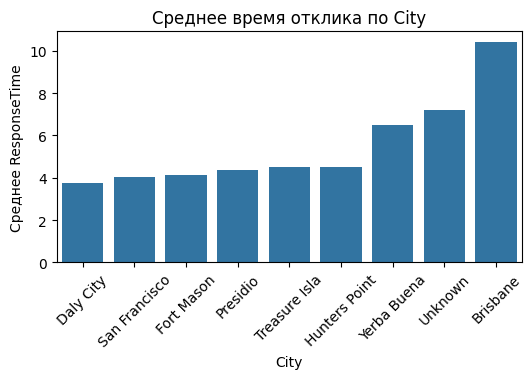

In [ ]:
# влияние данного признака на таргет
plt.figure(figsize=(6,3))
sns.barplot(x=city_response.index, y=city_response.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее ResponseTime')
plt.title('Среднее время отклика по City')
plt.show()


In [ ]:
df_model.Battalion.unique()

array(['B06', 'B09', 'B05', 'B02', 'B08', 'B03', 'B01', 'B10', 'B07',
       'B04', 'B99', 'B12', nan], dtype=object)

In [ ]:
df_model['Battalion'] = df_model['Battalion'].fillna('Unknown')


In [ ]:
battalion_response = df_model.groupby('Battalion')['ResponseTime'].mean().sort_values()
print(battalion_response)


Battalion
B12        0.000000
Unknown    2.816667
B04        3.653695
B02        3.674817
B07        3.770267
B01        3.780995
B09        3.788157
B99        3.830692
B08        4.101862
B03        4.102392
B10        4.121021
B06        4.925518
B05        5.645780
Name: ResponseTime, dtype: float64


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195022 entries, 244679 to 16315
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ResponseTime               195022 non-null  float64
 1   Call_type                  195022 non-null  object 
 2   Station Area               194891 non-null  float64
 3   Number of Alarms           195021 non-null  float64
 4   Unit-type                  195022 non-null  object 
 5   City                       195022 non-null  object 
 6   Battalion                  195022 non-null  object 
 7   Hour                       195022 non-null  int32  
 8   Weekday                    195022 non-null  int32  
 9   Month                      195022 non-null  int32  
 10  Original_priority_encoded  195022 non-null  int64  
dtypes: float64(3), int32(3), int64(1), object(4)
memory usage: 15.6+ MB


In [ ]:
df_model = df_model.drop(columns=['Original_priority'])


In [ ]:
df_model[['ResponseTime','Station Area','Number of Alarms','Hour','Weekday','Month']].isna().sum()


,0
ResponseTime,0
Station Area,131
Number of Alarms,1
Hour,0
Weekday,0
Month,0


In [ ]:
# Заполняем пропуски медианой
df_model['Station Area'].fillna(df_model['Station Area'].median(), inplace=True)
df_model['Number of Alarms'].fillna(df_model['Number of Alarms'].median(), inplace=True)


/tmp/ipython-input-4153751644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Station Area'].fillna(df_model['Station Area'].median(), inplace=True)
/tmp/ipython-input-4153751644.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195022 entries, 244679 to 16315
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ResponseTime               195022 non-null  float64
 1   Call_type                  195022 non-null  object 
 2   Station Area               195022 non-null  float64
 3   Number of Alarms           195022 non-null  float64
 4   Unit-type                  195022 non-null  object 
 5   City                       195022 non-null  object 
 6   Battalion                  195022 non-null  object 
 7   Hour                       195022 non-null  int32  
 8   Weekday                    195022 non-null  int32  
 9   Month                      195022 non-null  int32  
 10  Original_priority_encoded  195022 non-null  int64  
dtypes: float64(3), int32(3), int64(1), object(4)
memory usage: 15.6+ MB


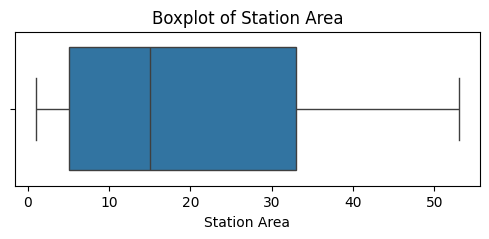

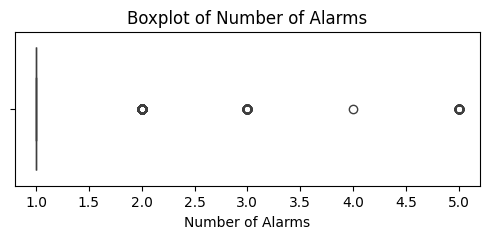

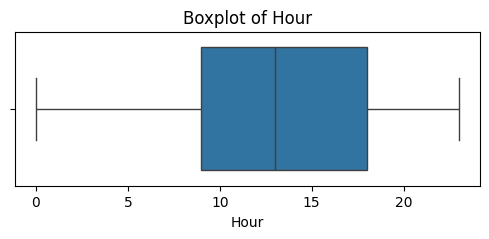

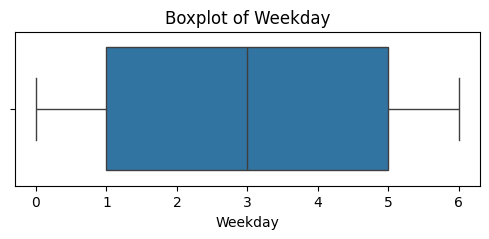

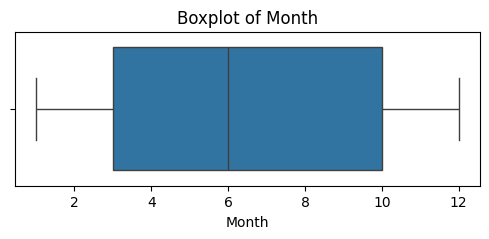

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Station Area', 'Number of Alarms', 'Hour', 'Weekday', 'Month']

for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df_model[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
import numpy as np

# Обрезка по 99-му процентилю
upper_limit = df_model['Number of Alarms'].quantile(0.99)
df_model['Number of Alarms_capped'] = df_model['Number of Alarms'].clip(upper=upper_limit)

# Логарифмирование (оригинальной и обрезанной версии)
df_model['Number of Alarms_log'] = np.log1p(df_model['Number of Alarms'])
df_model['Number of Alarms_capped_log'] = np.log1p(df_model['Number of Alarms_capped'])


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195022 entries, 244679 to 16315
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ResponseTime                 195022 non-null  float64
 1   Call_type                    195022 non-null  object 
 2   Station Area                 195022 non-null  float64
 3   Number of Alarms             195022 non-null  float64
 4   Unit-type                    195022 non-null  object 
 5   City                         195022 non-null  object 
 6   Battalion                    195022 non-null  object 
 7   Hour                         195022 non-null  int32  
 8   Weekday                      195022 non-null  int32  
 9   Month                        195022 non-null  int32  
 10  Original_priority_encoded    195022 non-null  int64  
 11  Number of Alarms_capped      195022 non-null  float64
 12  Number of Alarms_log         195022 non-null  float64
 13  

Итог:
Call_type, Unite-type, City, Battalion - OHE для линейных
моделей; label encoding - для градиентного бустинга
Number of Alarms - четыре варианта: оригинал, capped, log, capped_log  и использовать где приемлимо



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- 1. Добавляем новые признаки ---

# Время суток по часам

def hour_period(h):
  if 6 <= h < 12:
    return 'morning'
  elif 12 <= h < 18:
    return 'afternoon'
  elif 18 <= h < 24:
    return 'evening'
  else:
    return 'night'



df_model['Hour_period'] = df_model['Hour'].apply(hour_period)

# Выходной / будний день

df_model['is_weekend'] = df_model['Weekday'].isin([5,6]).astype(int)  # 5,6 — суббота, воскресенье

# Сезон по месяцу

def month_to_season(m):
  if m in [12,1,2]:
    return 'winter'
  elif m in [3,4,5]:
    return 'spring'
  elif m in [6,7,8]:
    return 'summer'
  else:
    return 'autumn'

df_model['Season'] = df_model['Month'].apply(month_to_season)

# --- 2. Категориальные признаки ---

categorical_cols = ['Call_type', 'Unit-type', 'City', 'Battalion', 'Hour_period', 'Season']

# Label Encoding для градиентного бустинга

le_dict = {}
for col in categorical_cols:
  le = LabelEncoder()
df_model[col] = le.fit_transform(df_model[col])
le_dict[col] = le  # сохраняем на случай обратного преобразования

# --- 3. Выбираем признаки и целевую переменную ---

feature_cols = [
'Station Area',
'Hour',
'Weekday',
'Month',
'Number of Alarms_capped_log',  # выбран вариант по умолчанию
] + categorical_cols + ['is_weekend']  # добавляем новые категориальные/фичи

X = df_model[feature_cols]
y = df_model['ResponseTime']

print(f"X shape: {X.shape}, y shape: {y.shape}")
X.head()


X shape: (195022, 12), y shape: (195022,)


,Station Area,Hour,Weekday,Month,Number of Alarms_capped_log,Call_type,Unit-type,City,Battalion,Hour_period,Season,is_weekend
244679,7.0,21,5,3,0.693147,Medical Incident,MEDIC,San Francisco,B06,evening,1,1
214172,44.0,21,5,1,0.693147,Medical Incident,MEDIC,San Francisco,B09,evening,3,1
10221,12.0,12,6,4,0.693147,Medical Incident,PRIVATE,San Francisco,B05,afternoon,1,1
139106,36.0,16,1,10,0.693147,Medical Incident,PRIVATE,San Francisco,B02,afternoon,0,0
107275,44.0,17,6,8,0.693147,Structure Fire / Smoke in Building,ENGINE,San Francisco,B09,afternoon,2,1


In [ ]:
df_model[['ResponseTime', 'Call_type', 'Station Area', 'Original_priority',
       'Number of Alarms', 'Unit-type', 'City', 'Battalion', 'Hour', 'Weekday',
       'Month', 'Original_priority_encoded']]

In [ ]:
df_model.head()

,ResponseTime,Call_type,Station Area,Number of Alarms,Unit-type,City,Battalion,Hour,Weekday,Month,Original_priority_encoded,Number of Alarms_capped,Number of Alarms_log,Number of Alarms_capped_log
244679,2.550000,Medical Incident,7.0,1.0,MEDIC,San Francisco,B06,21,5,3,1,1.0,0.693147,0.693147
214172,2.300000,Medical Incident,44.0,1.0,MEDIC,San Francisco,B09,21,5,1,6,1.0,0.693147,0.693147
10221,3.600000,Medical Incident,12.0,1.0,PRIVATE,San Francisco,B05,12,6,4,7,1.0,0.693147,0.693147
139106,2.300000,Medical Incident,36.0,1.0,PRIVATE,San Francisco,B02,16,1,10,6,1.0,0.693147,0.693147
107275,0.966667,Structure Fire / Smoke in Building,44.0,1.0,ENGINE,San Francisco,B09,17,6,8,6,1.0,0.693147,0.693147


In [ ]:
# Обработка категориальных переменных через get_dummies
cat_cols = ['Call Type', 'Station Area', 'Original Priority', 'Unit Type', 'City', 'Battalion']

df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

In [ ]:
# Проверка готового датасета
print("Размер датасета:", df_model.shape)
df_model.head()

Размер датасета: (93469, 137)


,ResponseTime,Number of Alarms,Hour,Weekday,Month,Call Type_Aircraft Emergency,Call Type_Alarms,Call Type_Assist Police,Call Type_Citizen Assist / Service Call,Call Type_Confined Space / Structure Collapse,...,Battalion_B04,Battalion_B05,Battalion_B06,Battalion_B07,Battalion_B08,Battalion_B09,Battalion_B10,Battalion_B100,Battalion_B12,Battalion_B99
1377122,3.866667,1,1,3,12,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6765924,3.066667,1,12,1,9,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5145265,2.900000,1,17,2,5,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
101413,0.000000,1,21,3,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2507140,3.233333,1,0,1,10,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93469 entries, 1377122 to 3568543
Columns: 137 entries, ResponseTime to Battalion_B99
dtypes: bool(132), float64(1), int32(3), int64(1)
memory usage: 15.0 MB


dt_model.info()

# statistical findings

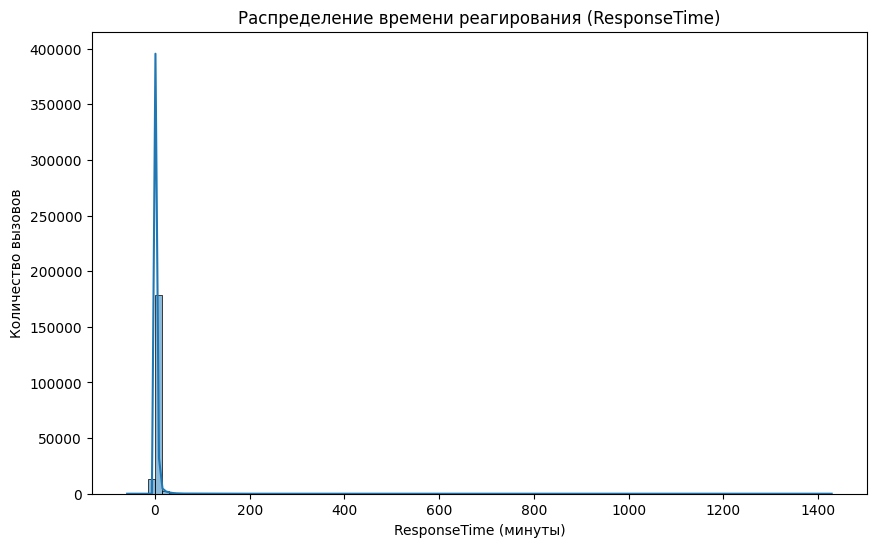

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, f_oneway

# Распределение ResponseTime
plt.figure(figsize=(10,6))
sns.histplot(df_sample['ResponseTime'], bins=100, kde=True)
plt.title('Распределение времени реагирования (ResponseTime)')
plt.xlabel('ResponseTime (минуты)')
plt.ylabel('Количество вызовов')
plt.show()


In [ ]:
# Основная статистика
print("Описание ResponseTime:")
print(df_sample['ResponseTime'].describe())


Описание ResponseTime:
count    93469.000000
mean         4.060604
std          9.785318
min        -56.066667
25%          2.150000
50%          3.083333
75%          4.283333
max       1210.800000
Name: ResponseTime, dtype: float64


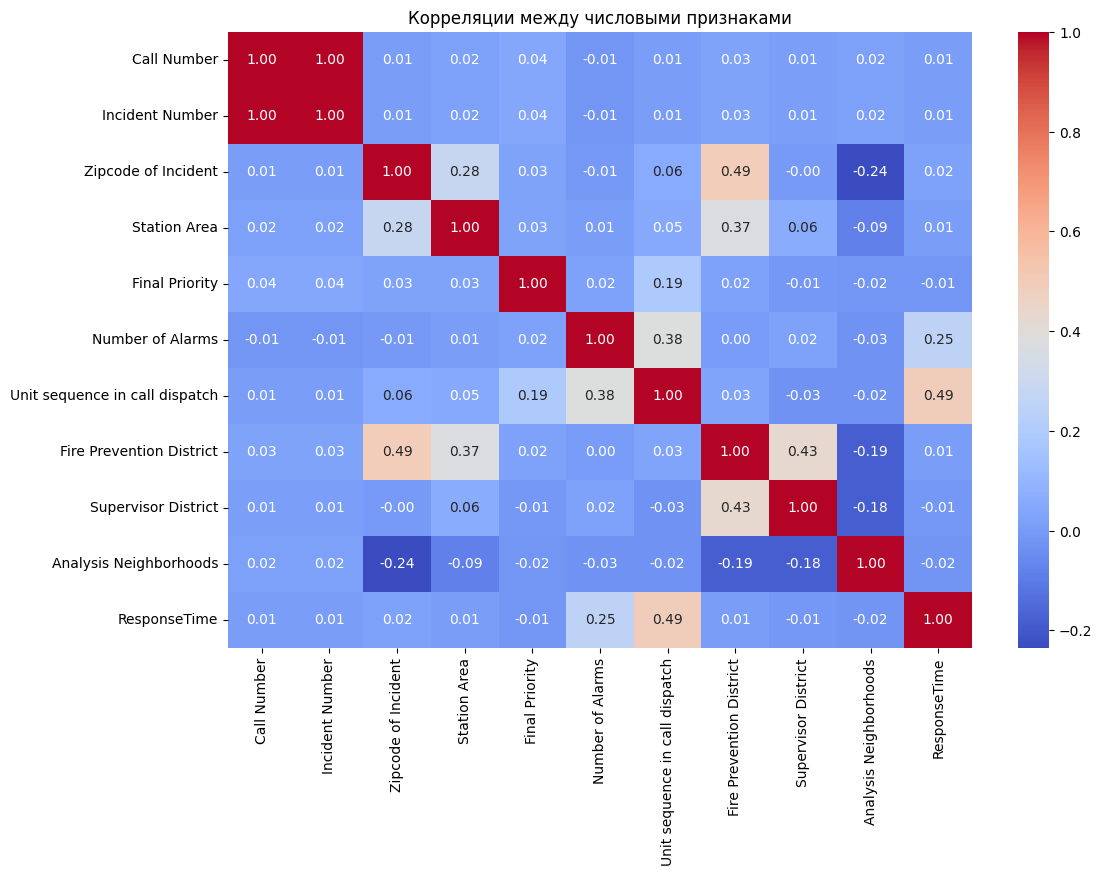

In [ ]:
# Выбираем только числовые колонки
num_cols = df_sample.select_dtypes(include=['float64', 'int64', 'bool']).columns
corr_matrix = df_sample[num_cols].corr()

# Строим heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляции между числовыми признаками")
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu, kruskal, spearmanr

# Категориальные признаки
categorical_cols = ['Call_type', 'Unit-type', 'City', 'Battalion', 'Hour_period', 'Season']

print("=== Категориальные признаки ===")
for col in categorical_cols:
    counts = df_model[col].value_counts()
    num_groups = len(counts)

    # Проверяем минимальный размер группы
    min_count = counts.min()
    if min_count < 5:  # мало данных, пропускаем
        print(f"{col}: пропускаем, слишком мало данных в некоторых группах")
        continue

    if num_groups == 2:
        # Mann-Whitney U test
        group_vals = counts.index.tolist()
        group1 = df_model[df_model[col] == group_vals[0]]['ResponseTime']
        group2 = df_model[df_model[col] == group_vals[1]]['ResponseTime']
        stat, p = mannwhitneyu(group1, group2)
        print(f"{col} (2 группы): Mann-Whitney U test statistic={stat:.3f}, p-value={p:.5f}")
    else:
        # Kruskal-Wallis H test
        groups = [df_model[df_model[col] == val]['ResponseTime'] for val in counts.index]
        stat, p = kruskal(*groups)
        print(f"{col} ({num_groups} групп): Kruskal-Wallis H test statistic={stat:.3f}, p-value={p:.5f}")

# Числовые признаки
num_cols = ['Station Area', 'Number of Alarms_capped_log', 'Hour', 'Weekday', 'Month']

print("\n=== Числовые признаки ===")
for col in num_cols:
    corr, p = spearmanr(df_model[col], df_model['ResponseTime'])
    print(f"{col}: Spearman correlation={corr:.3f}, p-value={p:.5f}")



=== Категориальные признаки ===
Call_type: пропускаем, слишком мало данных в некоторых группах
Unit-type: пропускаем, слишком мало данных в некоторых группах
City: пропускаем, слишком мало данных в некоторых группах
Battalion: пропускаем, слишком мало данных в некоторых группах
Hour_period (4 групп): Kruskal-Wallis H test statistic=1442.913, p-value=0.00000
Season (4 групп): Kruskal-Wallis H test statistic=41.263, p-value=0.00000

=== Числовые признаки ===
Station Area: Spearman correlation=0.028, p-value=0.00000
Number of Alarms_capped_log: Spearman correlation=nan, p-value=nan


/tmp/ipython-input-4149198260.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = spearmanr(df_model[col], df_model['ResponseTime'])


Hour: Spearman correlation=-0.060, p-value=0.00000
Weekday: Spearman correlation=-0.009, p-value=0.00005
Month: Spearman correlation=-0.013, p-value=0.00000


In [ ]:
df_model['Number of Alarms_capped_log'].describe()


,Number of Alarms_capped_log
count,1.950220e+05
mean,6.931472e-01
std,9.871018e-13
min,6.931472e-01
25%,6.931472e-01
50%,6.931472e-01
75%,6.931472e-01
max,6.931472e-01


# Modeling

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 156017, number of used features: 68
[LightGBM] [Info] Start training from score 4.072797


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


              Model  RMSE_train  R2_train  RMSE_test   R2_test
0          LightGBM    8.939744  0.547797   8.817167  0.441547
1      RandomForest    6.498363  0.761059   9.734621  0.319283
2  GradientBoosting   10.083944  0.424634  10.921338  0.143199
3          AdaBoost   13.444170 -0.022707  12.879239 -0.191540


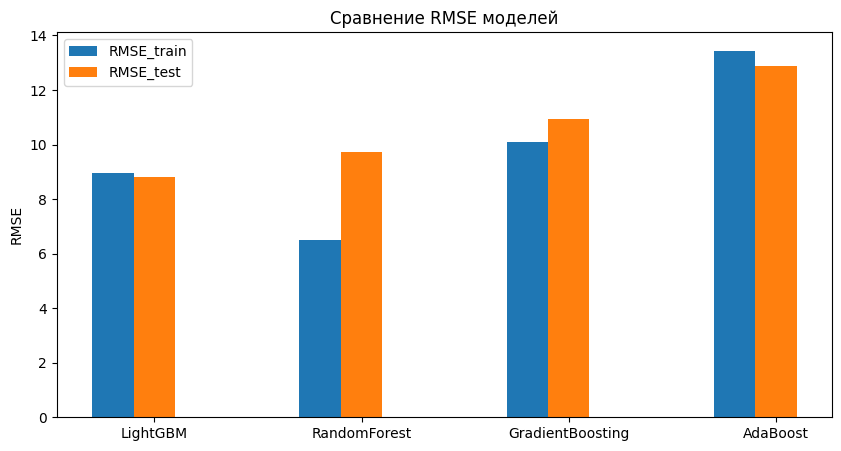

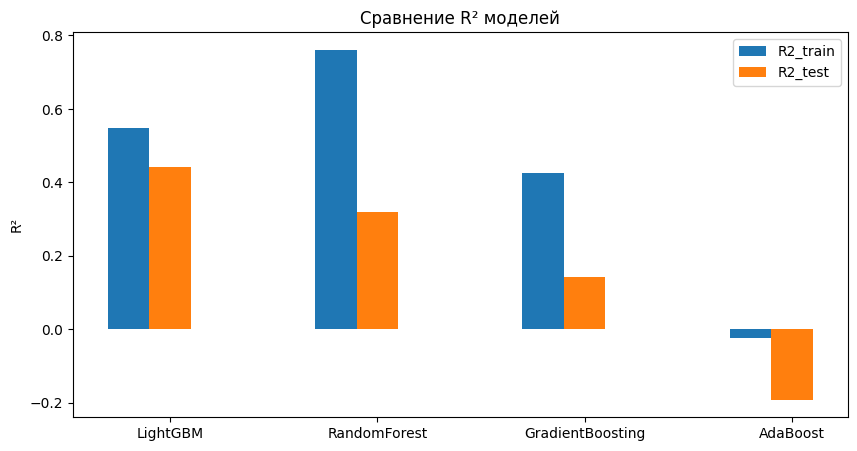

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Признаки ---
numerical_cols = ['Station Area', 'Hour', 'Weekday', 'Month', 'Number of Alarms_capped_log']
categorical_cols = ['Call_type', 'Unit-type', 'City', 'Battalion', 'Hour_period', 'Season', 'is_weekend']

# Проверяем константные числовые признаки
numerical_cols = [col for col in numerical_cols if df_model[col].nunique() > 1]

X = df_model[numerical_cols + categorical_cols]
y = df_model['ResponseTime']

# --- 2. Делим на train/test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Трансформеры ---
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# --- 4. Модели ---
models = {
    'LightGBM': lgb.LGBMRegressor(random_state=42, n_jobs=-1),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
}

# --- 5. Обучение, метрики и таблица результатов ---
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])
    pipe.fit(X_train, y_train)

    # Предсказания
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # Метрики
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    results.append({
        'Model': name,
        'RMSE_train': rmse_train,
        'R2_train': r2_train,
        'RMSE_test': rmse_test,
        'R2_test': r2_test
    })

results_df = pd.DataFrame(results)
print(results_df)

# --- 6. Визуализация ---
plt.figure(figsize=(10,5))
x = np.arange(len(results_df))
width = 0.2

plt.bar(x - width, results_df['RMSE_train'], width, label='RMSE_train')
plt.bar(x, results_df['RMSE_test'], width, label='RMSE_test')
plt.xticks(x, results_df['Model'])
plt.ylabel('RMSE')
plt.title('Сравнение RMSE моделей')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(x - width, results_df['R2_train'], width, label='R2_train')
plt.bar(x, results_df['R2_test'], width, label='R2_test')
plt.xticks(x, results_df['Model'])
plt.ylabel('R²')
plt.title('Сравнение R² моделей')
plt.legend()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 156017, number of used features: 68
[LightGBM] [Info] Start training from score 4.072797


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


              Model  RMSE_train  R2_train  RMSE_test   R2_test
0          LightGBM    8.544458  0.586903   8.755236  0.449365
1      RandomForest    7.818803  0.654090   8.626594  0.465427
2  GradientBoosting    8.320260  0.608297  10.212868  0.250755
3          AdaBoost   14.410204 -0.174961  14.228968 -0.454370


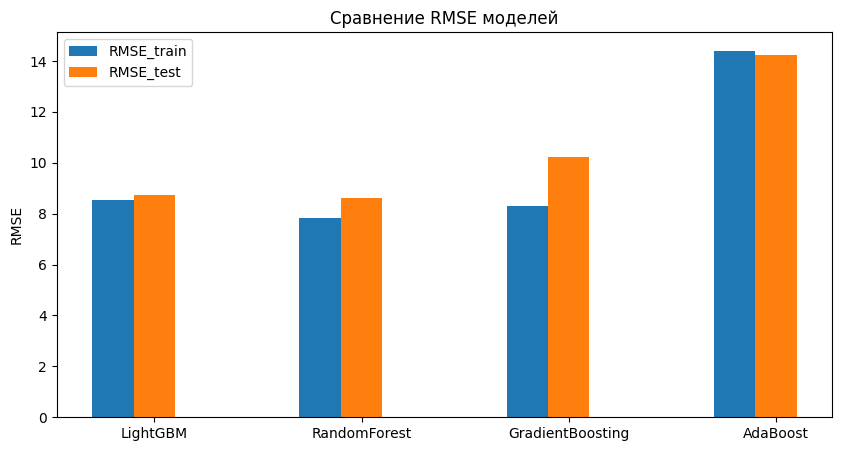

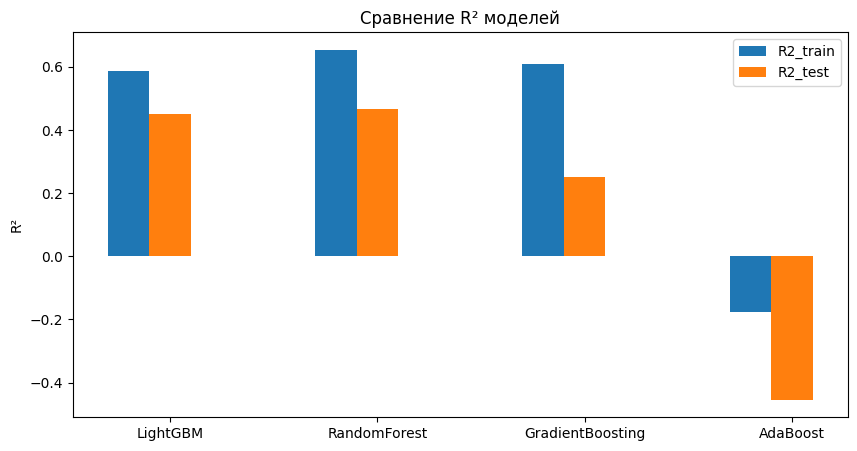

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# --- Признаки ---
numerical_cols = ['Station Area', 'Hour', 'Weekday', 'Month', 'Number of Alarms_capped_log']
categorical_cols = ['Call_type', 'Unit-type', 'City', 'Battalion', 'Hour_period', 'Season', 'is_weekend']
numerical_cols = [col for col in numerical_cols if df_model[col].nunique() > 1]

X = df_model[numerical_cols + categorical_cols]
y = df_model['ResponseTime']

# --- Делим на train/test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Трансформеры ---
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# --- Модели с настройкой гиперпараметров ---
models = {
    'LightGBM': lgb.LGBMRegressor(
        n_estimators=500, learning_rate=0.05, num_leaves=31, max_depth=10, random_state=42, n_jobs=-1
    ),
    'RandomForest': RandomForestRegressor(
        n_estimators=200, max_depth=15, max_features='sqrt', random_state=42, n_jobs=-1
    ),
    'GradientBoosting': GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42
    ),
    'AdaBoost': AdaBoostRegressor(
        n_estimators=200, learning_rate=0.05, random_state=42
    )
}

# --- Обучение, метрики и таблица результатов ---
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])
    pipe.fit(X_train, y_train)

    # Предсказания
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # Метрики
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    results.append({
        'Model': name,
        'RMSE_train': rmse_train,
        'R2_train': r2_train,
        'RMSE_test': rmse_test,
        'R2_test': r2_test
    })

results_df = pd.DataFrame(results)
print(results_df)

# --- Визуализация ---
plt.figure(figsize=(10,5))
x = np.arange(len(results_df))
width = 0.2

plt.bar(x - width, results_df['RMSE_train'], width, label='RMSE_train')
plt.bar(x, results_df['RMSE_test'], width, label='RMSE_test')
plt.xticks(x, results_df['Model'])
plt.ylabel('RMSE')
plt.title('Сравнение RMSE моделей')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(x - width, results_df['R2_train'], width, label='R2_train')
plt.bar(x, results_df['R2_test'], width, label='R2_test')
plt.xticks(x, results_df['Model'])
plt.ylabel('R²')
plt.title('Сравнение R² моделей')
plt.legend()
plt.show()


In [ ]:
print(df_model['ResponseTime'].min())   # должно быть >= 0
print(df_model['ResponseTime'].isna().sum())


-58.65
0


Количество строк после фильтра: 195018
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 156014, number of used features: 67
[LightGBM] [Info] Start training from score 1.383836


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


              Model  RMSE_train  R2_train  RMSE_test   R2_test
0          LightGBM   10.965563  0.305721  10.018035  0.344790
1      RandomForest   12.596308  0.083867  11.847170  0.083686
2  GradientBoosting   11.419572  0.247041  10.930867  0.219946
3          AdaBoost   12.605924  0.082468  11.836587  0.085322


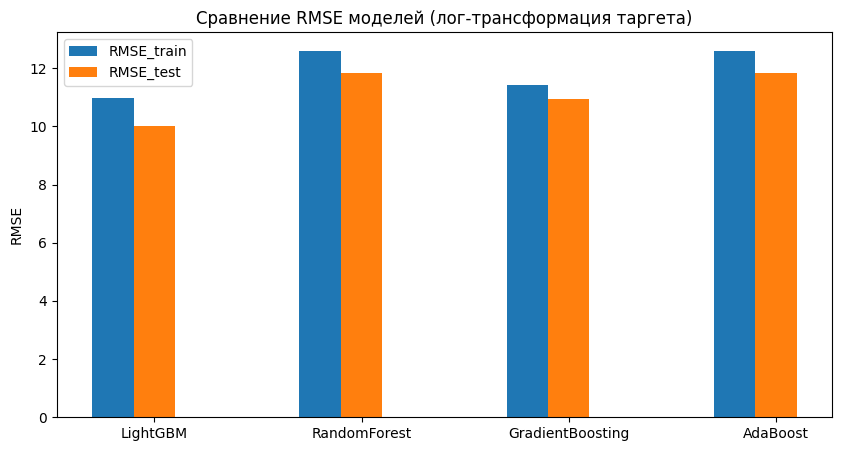

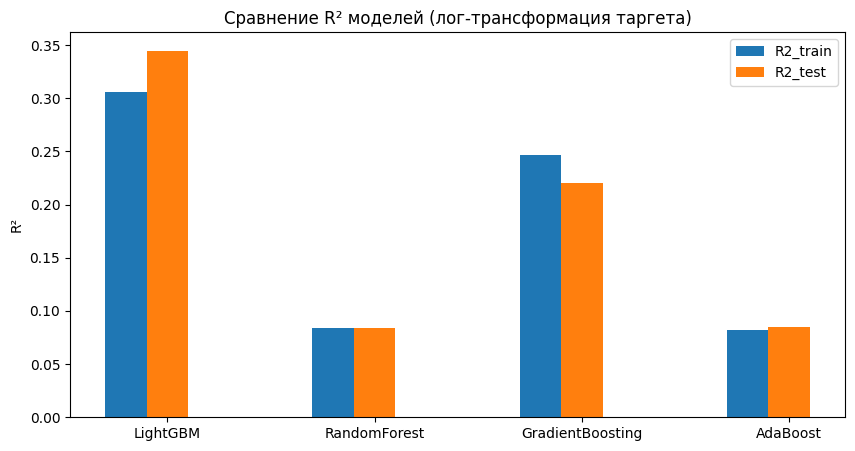

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Очищаем таргет ---
df_model_clean = df_model[df_model['ResponseTime'] >= 0].copy()  # удаляем отрицательные значения
print("Количество строк после фильтра:", len(df_model_clean))

# --- 2. Признаки ---
numerical_cols = ['Station Area', 'Hour', 'Weekday', 'Month', 'Number of Alarms_capped_log']
categorical_cols = ['Call_type', 'Unit-type', 'City', 'Battalion', 'Hour_period', 'Season', 'is_weekend']
numerical_cols = [col for col in numerical_cols if df_model_clean[col].nunique() > 1]

X = df_model_clean[numerical_cols + categorical_cols]
y = df_model_clean['ResponseTime']

# --- 3. Логарифмируем таргет ---
y_log = np.log1p(y)  # log(1+y)

# --- 4. Делим на train/test ---
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# --- 5. Трансформеры ---
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# --- 6. Модели с гиперпараметрами ---
models = {
    'LightGBM': lgb.LGBMRegressor(
        n_estimators=500, learning_rate=0.05, num_leaves=31, max_depth=10, random_state=42, n_jobs=-1
    ),
    'RandomForest': RandomForestRegressor(
        n_estimators=200, max_depth=15, max_features='sqrt', random_state=42, n_jobs=-1
    ),
    'GradientBoosting': GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42
    ),
    'AdaBoost': AdaBoostRegressor(
        n_estimators=200, learning_rate=0.05, random_state=42
    )
}

# --- 7. Обучение и метрики ---
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])
    pipe.fit(X_train, y_train_log)

    # Предсказания в лог-пространстве
    y_pred_train_log = pipe.predict(X_train)
    y_pred_test_log = pipe.predict(X_test)

    # Обратное преобразование
    y_pred_train = np.expm1(y_pred_train_log)
    y_pred_test = np.expm1(y_pred_test_log)
    y_train_orig = np.expm1(y_train_log)
    y_test_orig = np.expm1(y_test_log)

    # Метрики на исходном таргете
    rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
    r2_train = r2_score(y_train_orig, y_pred_train)
    rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_pred_test))
    r2_test = r2_score(y_test_orig, y_pred_test)

    results.append({
        'Model': name,
        'RMSE_train': rmse_train,
        'R2_train': r2_train,
        'RMSE_test': rmse_test,
        'R2_test': r2_test
    })

results_df = pd.DataFrame(results)
print(results_df)

# --- 8. Визуализация ---
plt.figure(figsize=(10,5))
x = np.arange(len(results_df))
width = 0.2

plt.bar(x - width, results_df['RMSE_train'], width, label='RMSE_train')
plt.bar(x, results_df['RMSE_test'], width, label='RMSE_test')
plt.xticks(x, results_df['Model'])
plt.ylabel('RMSE')
plt.title('Сравнение RMSE моделей (лог-трансформация таргета)')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(x - width, results_df['R2_train'], width, label='R2_train')
plt.bar(x, results_df['R2_test'], width, label='R2_test')
plt.xticks(x, results_df['Model'])
plt.ylabel('R²')
plt.title('Сравнение R² моделей (лог-трансформация таргета)')
plt.legend()
plt.show()


                                         feature  importance
23                               Call_type_Other    0.131163
40                               Unit-type_MEDIC    0.129938
1                                           Hour    0.118000
0                                   Station Area    0.109565
26  Call_type_Structure Fire / Smoke in Building    0.104002
61                                 Battalion_B06    0.086985
75                                      Season_2    0.043766
73                                      Season_0    0.043276
60                                 Battalion_B05    0.038012
3                                          Month    0.027156
42                      Unit-type_RESCUE CAPTAIN    0.023024
2                                        Weekday    0.019741
54                                  City_Unknown    0.018192
39                       Unit-type_INVESTIGATION    0.017808
8        Call_type_Citizen Assist / Service Call    0.013874
20  Call_type_Mutual Aid

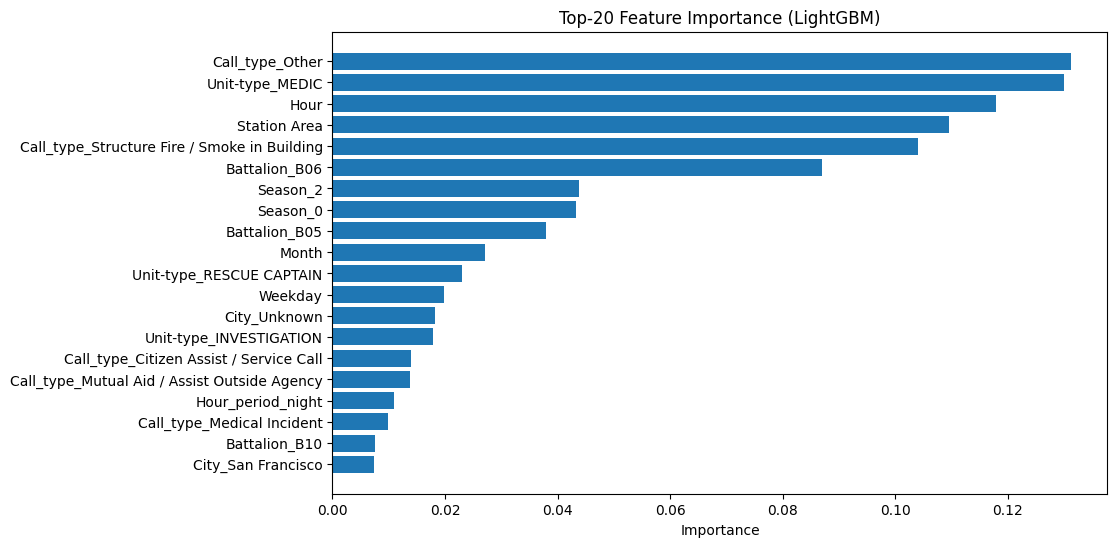

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Извлечём LightGBM из pipeline
lgb_model = pipe.named_steps['regressor']

# Получим признаки после one-hot кодирования
# preprocessor.transformers_[0][2] = числовые колонки
# preprocessor.transformers_[1][1] = OneHotEncoder для категориальных

# Числовые признаки
numeric_features = numerical_cols

# Категориальные признаки (именованые после OneHot)
cat_encoder = preprocessor.named_transformers_['cat']
categorical_features = cat_encoder.get_feature_names_out(categorical_cols)

# Объединяем все имена признаков
feature_names = np.concatenate([numeric_features, categorical_features])

# Важность признаков
importances = lgb_model.feature_importances_

# Создаём DataFrame
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

# Выводим топ-20 признаков
print(feat_imp.head(20))

# Визуализация
plt.figure(figsize=(10,6))
plt.barh(feat_imp['feature'][:20][::-1], feat_imp['importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top-20 Feature Importance (LightGBM)')
plt.show()


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool


0:	learn: 0.5483655	test: 0.5462931	best: 0.5462931 (0)	total: 326ms	remaining: 5m 25s
100:	learn: 0.5134620	test: 0.5101712	best: 0.5101712 (100)	total: 14.3s	remaining: 2m 7s
200:	learn: 0.5073876	test: 0.5038338	best: 0.5038338 (200)	total: 30.4s	remaining: 2m
300:	learn: 0.5031005	test: 0.4998092	best: 0.4998092 (300)	total: 46.5s	remaining: 1m 47s
400:	learn: 0.5010591	test: 0.4983563	best: 0.4983563 (400)	total: 1m 1s	remaining: 1m 32s
500:	learn: 0.4993192	test: 0.4970352	best: 0.4970352 (500)	total: 1m 19s	remaining: 1m 19s
600:	learn: 0.4979558	test: 0.4961764	best: 0.4961762 (599)	total: 1m 37s	remaining: 1m 4s
700:	learn: 0.4969070	test: 0.4956048	best: 0.4955995 (699)	total: 1m 53s	remaining: 48.4s
800:	learn: 0.4959303	test: 0.4950767	best: 0.4950767 (800)	total: 2m 9s	remaining: 32.2s
900:	learn: 0.4950292	test: 0.4946394	best: 0.4946394 (900)	total: 2m 27s	remaining: 16.2s
999:	learn: 0.4943541	test: 0.4943455	best: 0.4943454 (997)	total: 2m 43s	remaining: 0us

bestTest 

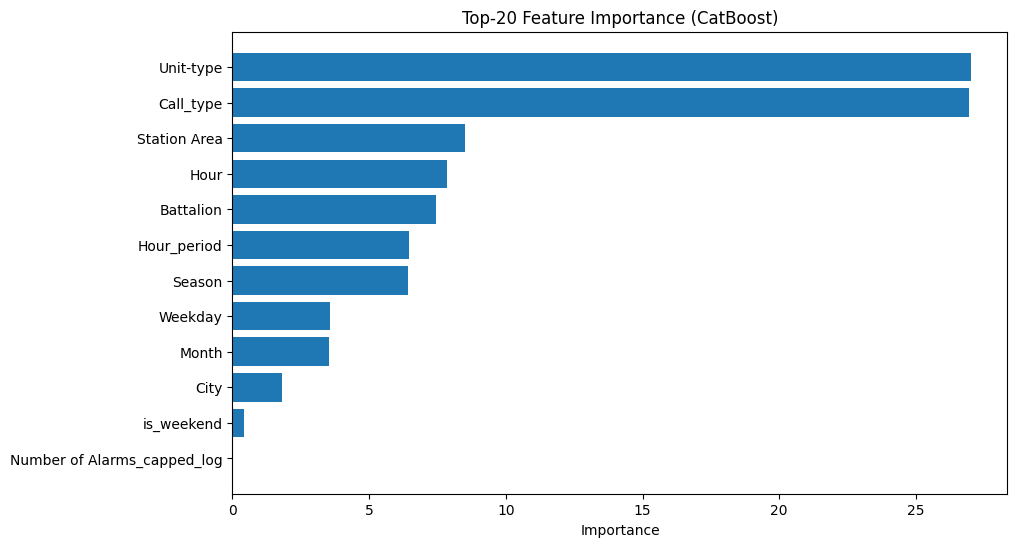

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Фильтруем корректные таргеты ---
df_model_clean = df_model[df_model['ResponseTime'] >= 0].copy()

# --- 2. Признаки и таргет ---
numerical_cols = ['Station Area', 'Hour', 'Weekday', 'Month', 'Number of Alarms_capped_log']
categorical_cols = ['Call_type', 'Unit-type', 'City', 'Battalion', 'Hour_period', 'Season', 'is_weekend']

X = df_model_clean[numerical_cols + categorical_cols]
y = df_model_clean['ResponseTime']

# --- 3. Лог-трансформация таргета ---
y_log = np.log1p(y)

# --- 4. Train/test split ---
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# --- 5. Обучаем CatBoost ---
cat_features_idx = [X.columns.get_loc(col) for col in categorical_cols]

cb_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

# Pool для категориальных признаков
train_pool = Pool(data=X_train, label=y_train_log, cat_features=cat_features_idx)
test_pool = Pool(data=X_test, label=y_test_log, cat_features=cat_features_idx)

cb_model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

# --- 6. Предсказания ---
y_pred_train_log = cb_model.predict(X_train)
y_pred_test_log = cb_model.predict(X_test)

y_pred_train = np.expm1(y_pred_train_log)
y_pred_test = np.expm1(y_pred_test_log)
y_train_orig = np.expm1(y_train_log)
y_test_orig = np.expm1(y_test_log)

# --- 7. Метрики ---
rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
r2_train = r2_score(y_train_orig, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_pred_test))
r2_test = r2_score(y_test_orig, y_pred_test)

print(f"CatBoost RMSE train: {rmse_train:.3f}, R2 train: {r2_train:.3f}")
print(f"CatBoost RMSE test: {rmse_test:.3f}, R2 test: {r2_test:.3f}")

# --- 8. Feature importance ---
feat_imp = cb_model.get_feature_importance(prettified=True)
print(feat_imp.head(20))

# --- 9. Визуализация топ-20 признаков ---
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature Id'][:20][::-1], feat_imp['Importances'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top-20 Feature Importance (CatBoost)')
plt.show()
